# Iris data set

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

### Import libraries and dataset itself.

*   Import pandas library to work with DataFrames and nicely viewed tables. 
*   Import numpy library to work with arrays.
*   Import Iris Dataset from sklearn library of datasets.

In [39]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

### Load and expore dataset

In [40]:
iris_dataset = load_iris()

As sklearn datasets stored as Bunch objects (similar in idea to dictionary structure), we can access parts of dataset by using keys() method. Dataset is separated into: 
*   "data" - 50 rows of samples by 4 columns of features;
*   "target" - class of the sample without label, has only "0,1,2" classifier;
*   "target_names" - actual labels for "target";
*   "DESCR" - detailed description of the dataset;
*   "feature_names" - actual labels for 4 columns in "data"


In [41]:
print("Keys of iris_dataset:\n{}".format(iris_dataset.keys()))

Keys of iris_dataset:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [42]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


### Split dataset

We'll need to split dataset into training set and test set, so we can train our model and then use test set for validation. Pseudo random_state is used for training purpose to get same data in training and test set every time we shuffle dataset. 

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

Load training dataset to pandas DataFrame, assign column names from "feature_names" key. You can access values of the key inside Bunch object either by using iris_dataset["feature_names"] or iris_dataset.feature_names.

In [44]:
iris_dataframe = pd.DataFrame(X_train,columns=iris_dataset.feature_names)

Display first 5 rows of iris_dataframe.

In [45]:
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


### Visualize the data

I prefer to use seaborn for visualization , but can be done with matplotlib as well.

In [46]:
import seaborn as sns

*   For visualization we create ned DataFrame as "df"
*   We add "Class" column by copying y_train, which is training subset of "target" values inside iris_dataset.
*   Plot using pairplot. Can specify what data you want to present on X and Y axis, as well as markers for each "Class". Color scheme is defined by assigning hue='Class', so we can plot each class in different color.

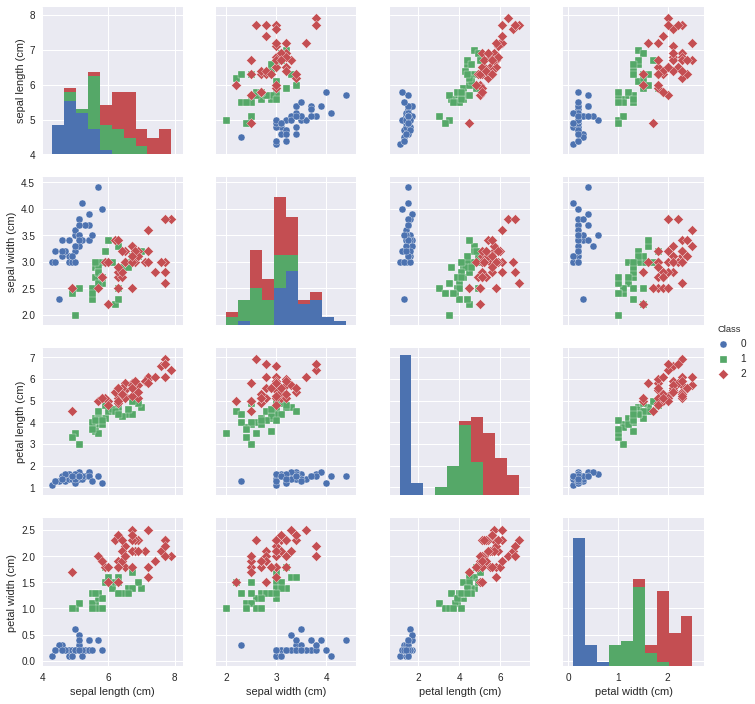

In [47]:
df = iris_dataframe
df['Class']=y_train
sns.pairplot(df,hue='Class',x_vars=["sepal length (cm)","sepal width (cm)","petal length (cm)",	"petal width (cm)"], y_vars=["sepal length (cm)","sepal width (cm)","petal length (cm)",	"petal width (cm)"], markers = ["o","s","D"])

### Instantiate and learn the model, predict response

We'll be using K-nearest neighbors classifier for our model with three neighbors. 

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

Train our model using training subset of the data.

In [49]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Display the accuracy for prediction on training and test subsets.

In [50]:
knn.score(X_train, y_train)

0.9642857142857143

In [51]:
knn.score(X_test, y_test)

0.9736842105263158

### Cross-validation

We used n_neighbors parameter equal to 3, which might not give us the best accuracy. We will need to estimate error by holding out subset of the "training set" from the fitting process. We'll use validation approach called **k-fold cross-validation**.  What we need to do is divide training set into k-groups. Then first fold is treated as a validation set, and the method is fit on the remaining k−1 folds.

Let's create 10-fold cross validation on our dataset using a generated list of odd K’s ranging from 1 to 50. First create a list of values from 1 to 50.

In [56]:
my_list = list(range(1,50))

Subset my_list to get only odd numbers. Need to change type of neighbors from "filter" to "list", otherwise we cannot plot it, because matplotlib doesn't support generators.

In [80]:
neighbors = filter(lambda x: x % 2 != 0, my_list)
neighbors = list(neighbors)

We imported cross_val_score method from sklearn. cv_scores will be our empty list to hold all the scores from cross validation loop. cv=10 parameter means that we'll do 10-fold cross validation, and as we're in classification setting, we should you 'accuracy' as scoring metric. cv_scores will contain the mean of cross validation scores.

In [106]:
from sklearn.cross_validation import cross_val_score
cv_scores = []
for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn,X_train,y_train,cv=10, scoring='accuracy')
  cv_scores.append(scores.mean())

Create a list for misclassification error

In [107]:
MSE = [1-x for x in cv_scores]

Determine optimal number of neighbors. For that we need to get minimum value in MSE list (the lower the error, the better is our model), get index of that mininmum value and then pass this index to corresponding "neighbors" list.

In [110]:
opt_neighbors = neighbors[MSE.index(min(MSE))]

In [111]:
print('Optimum number of neighbors: {}'.format(opt_neighbors))

Optimum number of neighbors: 7


Let's visualize the change of estimated error by change of number of neighbors.

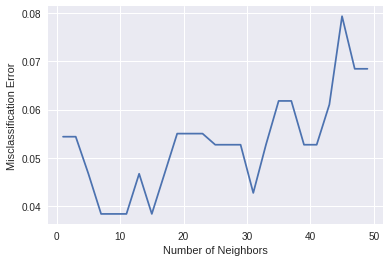

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(neighbors,MSE)
plt.xlabel('Number of Neighbors')
plt.ylabel('Misclassification Error')
plt.show()

From our plot we can see that the lowest misclassification error we can get is about 0.0375 with 7 neighbors.

### Predict class of random sample

X_new is a numpy array, it represents single sample with 4 features (sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)).

In [52]:
X_new = np.array([[5, 2.9, 1, 0.2]])

Shape method gives us info about how many rows/colums are in array. In our case it is one dimensional vector.

In [53]:
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


No we can run and display prediction on new sample (X_new).

In [54]:
prediction = knn.predict(X_new)

In [55]:
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']
